# Demonstration of Analyses for "Comparison of Structural and Metabolic Biomarkers of Neurodegeneration for Brain Age Prediction"

**Steps of Analysis:**\
1 - bias-correction\
2 - brain age prediction in cognitively normals (CN)\
2.1 - validation of brain age prediction in CN\
3 - brain age prediction in individuals with mild cognitive impairment (MCI)\
4.1 - association with cognitive performance/neuropathology in CN\
4.2 - association with cognitive performance/neuropathology in MCI\
5.1 - association with diagnosis changes after 24 months in CN\
5.2 - association with diagnosis changes after 24 months in MCI

Examplary demonstration for PET modality

In [1]:
from brain_age_main import main
modality = 'PET'

/opt/anaconda/anaconda3/lib/python3.8/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


### Bias-correction
Comparison of no bia-correction ('None'), correction with chronological age (CA, 'True'), and correction without CA ('False').

1/3 Correction with CA: None 
First column: 17Networks_LH_VisCent_ExStr_1 (should be 'X17Networks_LH_VisCent_ExStr_1')
Last column: CAU-lh (should be 'CAU-lh)
12 individuals younger than 65 years discarded.
Total participants:  438 Inside IQR of all regions:  410 
(28 participants discarded as outliers)
Outliers in train set:  10 Outliers in test set:  18


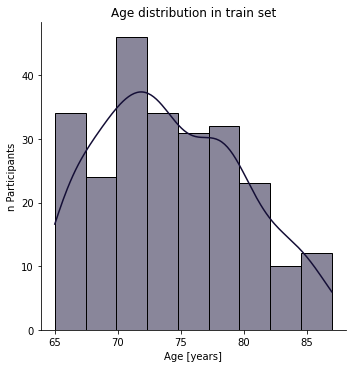

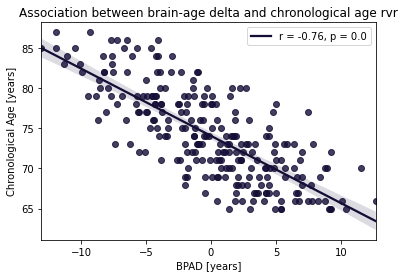

Significant association between  rvr -predicted age delta and CA: True


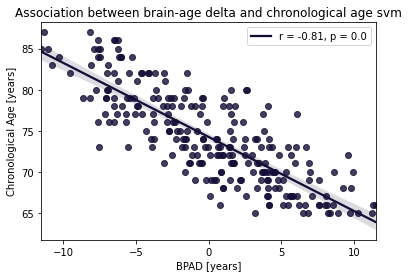

Significant association between  svm -predicted age delta and CA: True
---CROSS-VALIDATION---
 Final model (smallest MAE): rvr
MAE: 4.159630067721588, R2: 0.18397164157995693


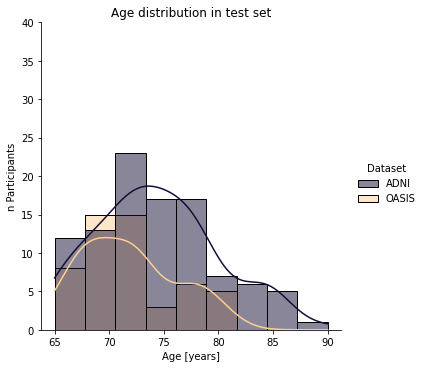

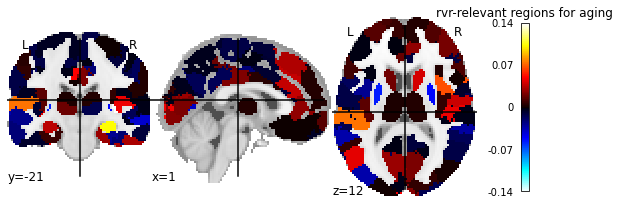

---TEST---
On average, predicted age of CN differed by  0.8662408096411222  years from their chronological age.
MAE = 4.277210966265259, R2 = -0.034118016727668454
ADNI:
MAE = 4.5864648189378165, R2 = -0.04424273416062707
OASIS:
MAE = 3.6765448293435607, R2 = -0.250642319985946




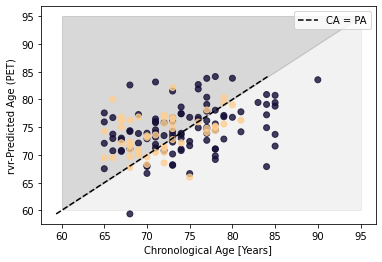

2/3 Correction with CA: True 
---TEST---
On average, predicted age of CN differed by  0.27048783887481803  years from their chronological age.
MAE = 2.5270891978558367, R2 = 0.6302641258264918
ADNI:
MAE = 2.7088111299197477, R2 = 0.6212498010870416
OASIS:
MAE = 2.1741292913470875, R2 = 0.5706756111447344




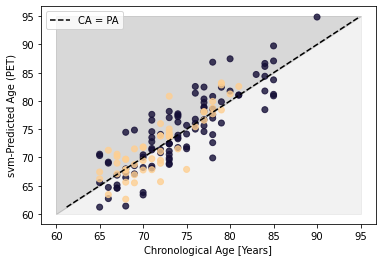

3/3 Correction with CA: False 
---TEST---
On average, predicted age of CN differed by  1.7330342640951348  years from their chronological age.
MAE = 9.224228042043457, R2 = -4.2494966369811555
ADNI:
MAE = 9.837498585687023, R2 = -4.430793523036655
OASIS:
MAE = 8.033067947658845, R2 = -4.91934982682563




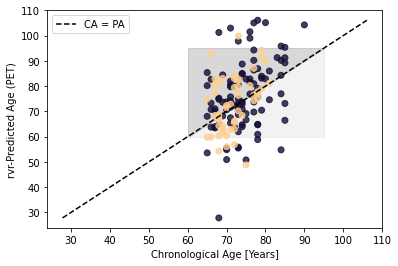

In [2]:
main(1, modality)

## Brain age prediction in CN

First column: 17Networks_LH_VisCent_ExStr_1 (should be 'X17Networks_LH_VisCent_ExStr_1')
Last column: CAU-lh (should be 'CAU-lh)
12 individuals younger than 65 years discarded.
Total participants:  438 Inside IQR of all regions:  410 
(28 participants discarded as outliers)
Outliers in train set:  10 Outliers in test set:  18


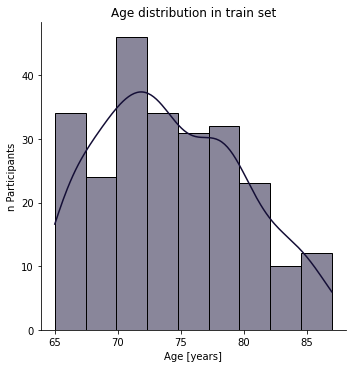

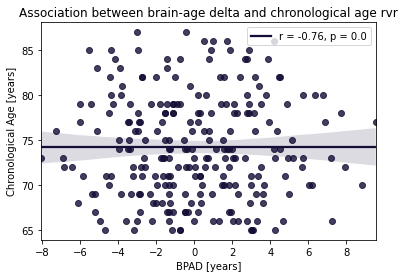

Significant association between  rvr -predicted age delta and CA: True


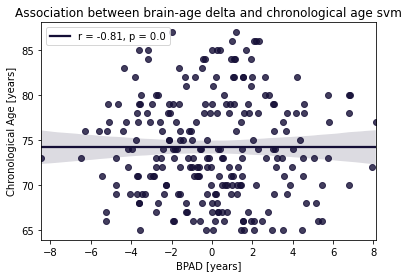

Significant association between  svm -predicted age delta and CA: True
---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 2.368331879579944, R2: 0.7265503325621289


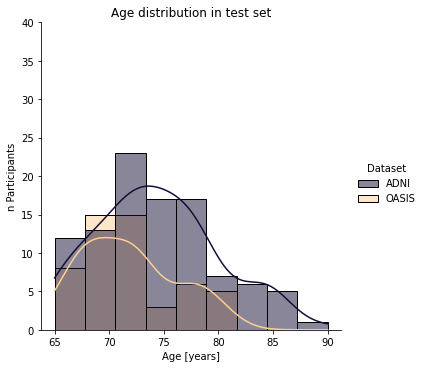

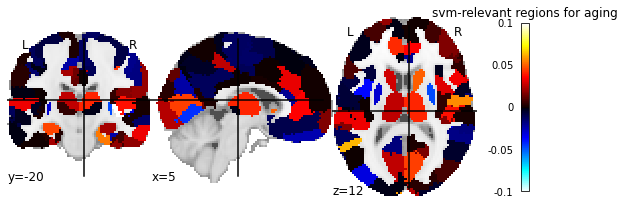

---TEST---
On average, predicted age of CN differed by  0.27048783887481803  years from their chronological age.
MAE = 2.5270891978558367, R2 = 0.6302641258264918
ADNI:
MAE = 2.7088111299197477, R2 = 0.6212498010870416
OASIS:
MAE = 2.1741292913470875, R2 = 0.5706756111447344




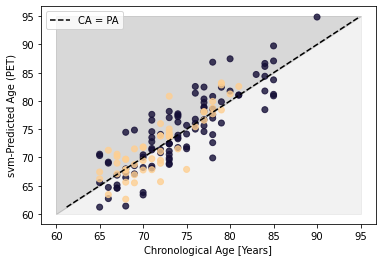

In [3]:
main(2, modality)

In [ ]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
pet_age = pd.read_csv('../results/CN/PET-predicted_age_CN.csv')
mri_age = pd.read_csv('../results/CN/MRI-predicted_age_CN.csv')
pet_age['BPAD'] = pet_age['Prediction'] - pet_age['Age']
mri_age['BPAD'] = mri_age['Prediction'] - mri_age['Age']
cm_main = pickle.load(open("../config/plotting_config_main.p", "rb"))
y_db_cat = [0 if not "OAS" in x else 1 for x in pet_age['PTID']]
fig, ax = plt.subplots(2,3, figsize=(30, 20))
ax[0,0].scatter(pet_age['Age'], pet_age['Prediction'], c=cm_main[y_db_cat], alpha=0.8)
ax[0,0].set_xlabel('Age', fontsize=15)
ax[0,0].set_ylabel('FDG-PET-predicted Age', fontsize=15)
ax[0,0].set_xticklabels(pet_age['Age'], fontsize=15)
ax[0,0].set_yticklabels(np.round(pet_age['Prediction'], 0), fontsize=15)
ax[0,1].scatter(mri_age['Age'], mri_age['Prediction'], c=cm_main[y_db_cat], alpha=0.8)
ax[0,1].set_xlabel('Age', fontsize=15)
ax[0,1].set_ylabel('MRI-predicted Age', fontsize=15)
ax[0,1].set_xticklabels(pet_age['Age'], fontsize=15)
ax[0,1].set_yticklabels(np.round(mri_age['Prediction'], 0), fontsize=15)
ax[0,2].scatter(pet_age['Prediction'], mri_age['Prediction'], c=cm_main[y_db_cat], alpha=0.8)
ax[0,2].set_xlabel('FDG-PET-predicted Age', fontsize=15)
ax[0,2].set_ylabel('MRI-predicted Age', fontsize=15)
ax[0,2].set_xticklabels(np.round(pet_age['Prediction'], 0), fontsize=15)
ax[0,2].set_yticklabels(np.round(mri_age['Prediction'], 0), fontsize=15)
ax[1,0].scatter(pet_age['BPAD'], mri_age['BPAD'], c=cm_main[y_db_cat], alpha=0.8)
ax[1,0].set_xlabel('FDG-PET-predicted Age', fontsize=15)
ax[1,0].set_ylabel('MRI-predicted Age', fontsize=15)
ax[1,0].set_xlim(-8, 8)
ax[1,0].set_ylim(-8, 8)
#ax[1,0].set_xticklabels(np.round(pet_age['BPAD'], 0), fontsize=15)
#ax[1,0].set_yticklabels(np.round(mri_age['BPAD'], 0), fontsize=15)
plt.show()

## Validation of brain age prediction in CN

In [4]:
main(2.1, modality)

100%|██████████| 50/50 [4:00:54<00:00, 289.09s/it]  

Range of 50 iterations:
MAE: 1.3682261607549506 - 2.6588626472755075 (mean: 2.0332576233868824) 
R2: 0.5755223139974819 - 0.8953257212160948 (mean: 0.7579020390718441) 
Models:  Counter({'svm': 43, 'rvr': 7})


## Brain age prediction in MCI

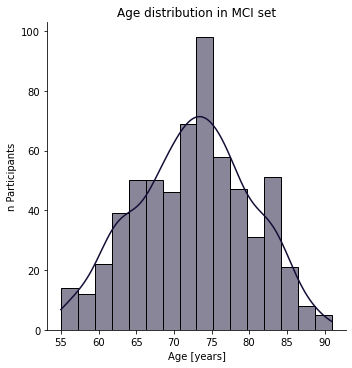

---MCI---
On average, predicted age of MCI differed by  0.7265554972863089  years from their chronological age.
MAE = 2.6795389101797533, R2 = 0.7925216881944976


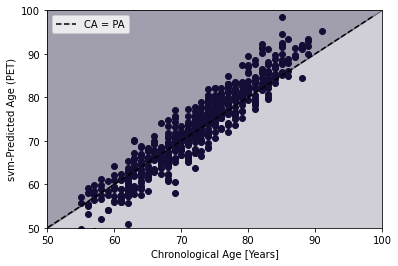

In [5]:
main(3, modality)

## Association with cognitive performance/neuropathology in CN

---SIGNIFICANT CORRELATIONS BETWEEN BPAD & NEUROPSYCHOLOGY/NEUROPATHOLOGY---
Not enough observations of PIB


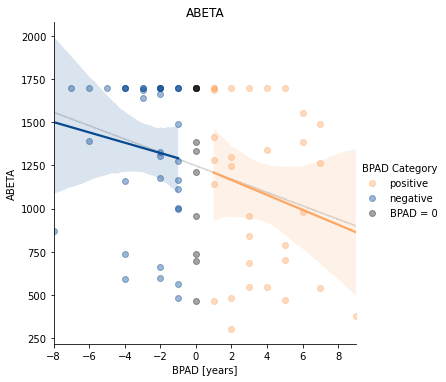

ABETA : -0.291 0.008827097125899413

---INTERACTION EFFECTS---
ABETA significant in positive BPAD:  False (-0.20033998900715294, 0.27987076116122084) 
significant in negative BPAD:  False (-0.13205211483608842, 0.442652486163181)


In [6]:
main(4.1, modality)

## Association with cognitive performance/neuropathology in MCI

---SIGNIFICANT CORRELATIONS BETWEEN BPAD & NEUROPSYCHOLOGY/NEUROPATHOLOGY---


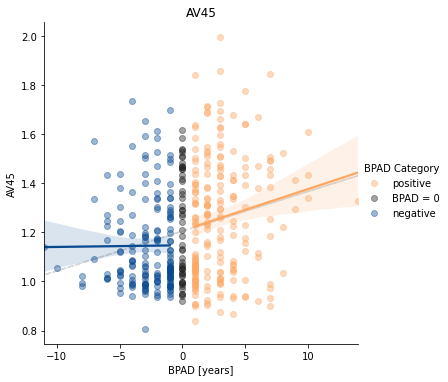

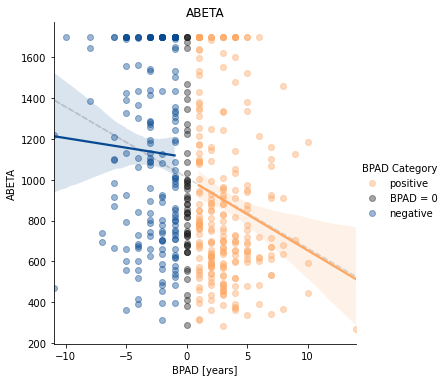

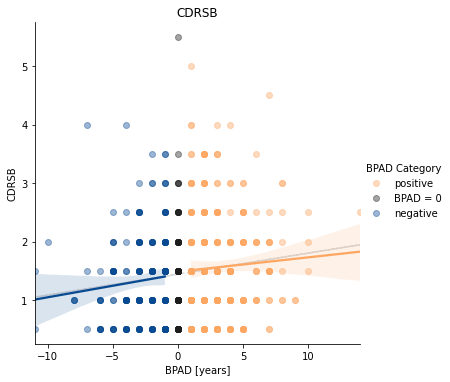

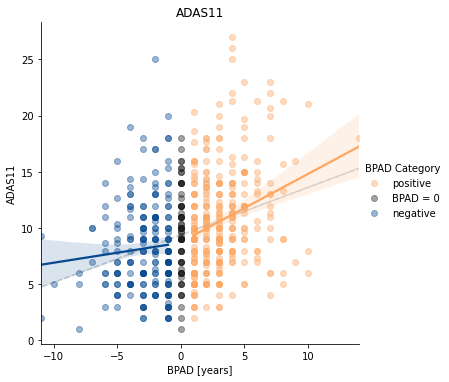

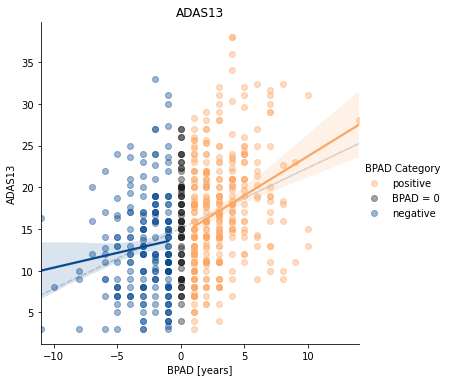

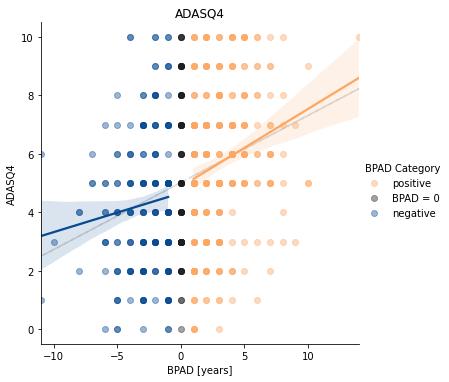

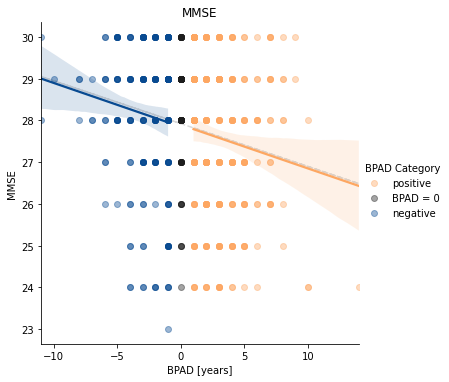

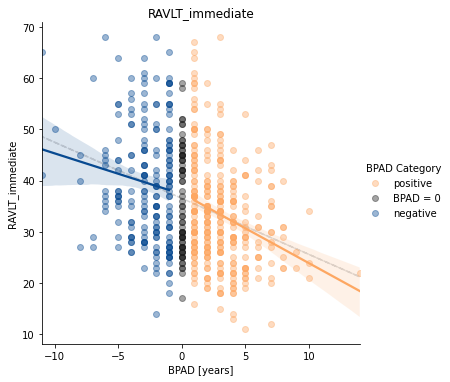

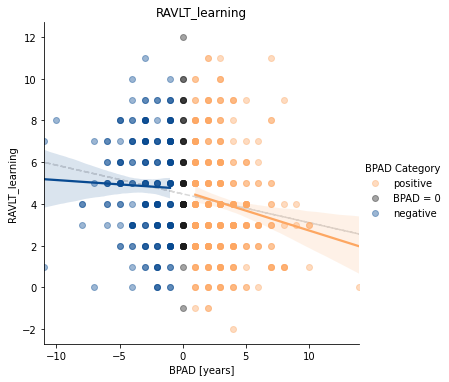

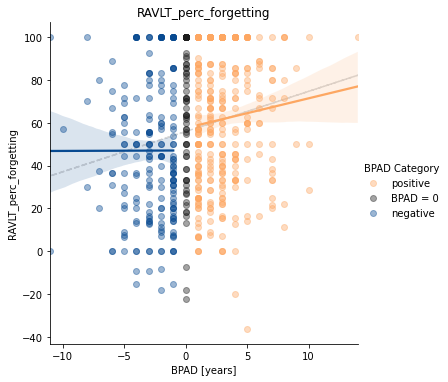

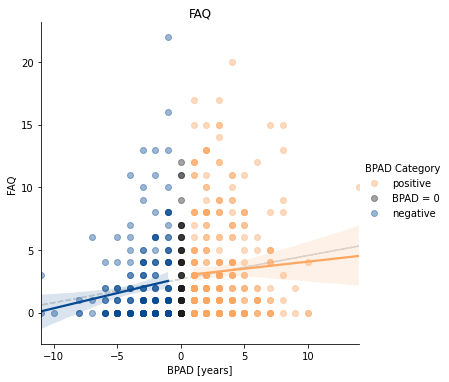

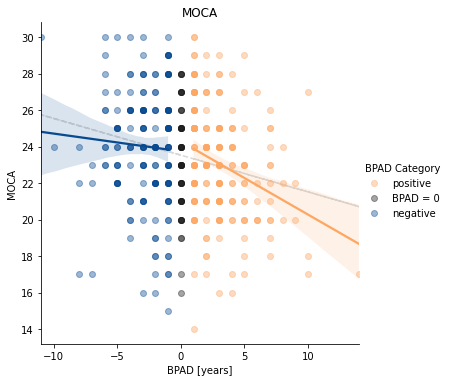

AV45 : 0.246 2.3416438591153387e-07
ABETA : -0.275 9.603795345670039e-10
CDRSB : 0.14 0.00048293833739920594
ADAS11 : 0.323 2.489401831045801e-16
ADAS13 : 0.366 8.145089874304074e-21
ADASQ4 : 0.301 2.6407644536508182e-14
MMSE : -0.195 1.0351252734825218e-06
RAVLT_immediate : -0.333 2.356231970001287e-17
RAVLT_learning : -0.18 6.691454394557658e-06
RAVLT_perc_forgetting : 0.193 1.431104370619326e-06
FAQ : 0.169 2.496275065000391e-05
MOCA : -0.222 2.491201072846904e-06

---INTERACTION EFFECTS---
AV45 significant in positive BPAD:  True (0.15527176962289063, 0.025844412489993134) 
significant in negative BPAD:  False (0.007137994891273591, 0.9259571958519635)
ABETA significant in positive BPAD:  True (-0.18688311090432788, 0.003196116237707041) 
significant in negative BPAD:  False (-0.042968982456584856, 0.5723366917876064)
CDRSB significant in positive BPAD:  False (0.05737057429695602, 0.29437843714566136) 
significant in negative BPAD:  False (0.10073581830797618, 0.1496693251659717)


In [7]:
main(4.2, modality)

## Analysis of Diagnosis Change in CN

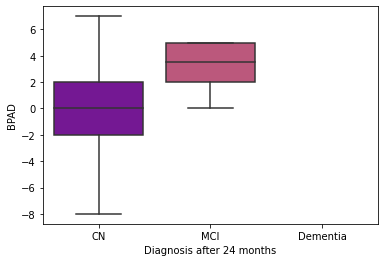

In [8]:
main(5.1, modality)

## Analysis of Diagnosis Change in MCI

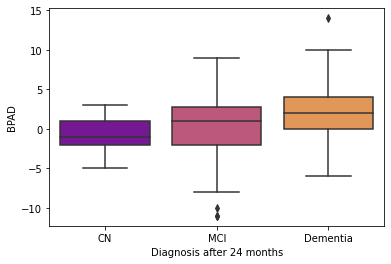

In [9]:
main(5.2, modality)